Matplotlib is building the font cache; this may take a moment.


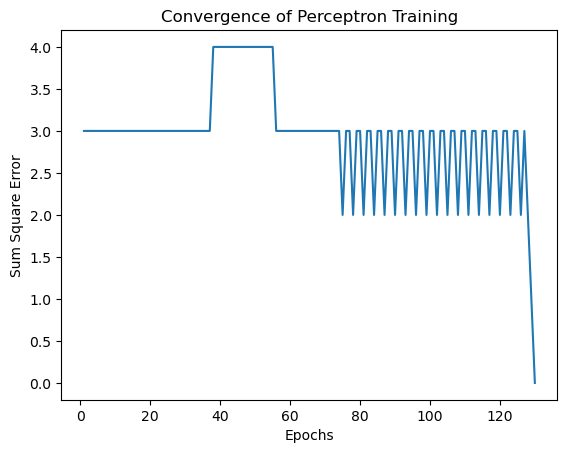

Converged after 130 epochs.
Final Weights: W0 = -0.10000000000000765, W1 = 0.1000000000000001, W2 = 0.05000000000000032


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the activation function (step function)
def step_activation(z):
    return 1 if z >= 0 else 0

# Define the AND gate training data
training_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

# Initialize variables to track error and epochs
errors = []
converged = False
max_epochs = 1000

# Training the perceptron
for epoch in range(max_epochs):
    total_error = 0
    for input_features, target_output in training_data:
        # Calculate the weighted sum of inputs
        weighted_sum = W0 + W1 * input_features[0] + W2 * input_features[1]
        
        # Calculate the predicted output using the step activation function
        predicted_output = step_activation(weighted_sum)
        
        # Calculate the error
        error = target_output - predicted_output
        
        # Update the weights
        W0 += learning_rate * error
        W1 += learning_rate * error * input_features[0]
        W2 += learning_rate * error * input_features[1]
        
        # Accumulate the total error for this epoch
        total_error += error ** 2
    
    # Append the total error to the list for plotting
    errors.append(total_error)
    
    # Check for convergence
    if total_error <= 0.002:
        converged = True
        break

# Plot the errors over epochs
plt.plot(range(1, epoch + 2), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Convergence of Perceptron Training')
plt.show()

# Print the results
if converged:
    print(f"Converged after {epoch + 1} epochs.")
else:
    print("Training did not converge within 1000 epochs.")
    
print(f"Final Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")


In [2]:
import numpy as np

# Define the AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Add a bias term to the input
X_bias = np.c_[np.ones(X.shape[0]), X]

# Calculate the pseudo-inverse of X_bias
X_pseudo_inv = np.linalg.pinv(X_bias)

# Calculate the weights using the pseudo-inverse
weights = np.dot(X_pseudo_inv, y)

# Print the weights
print("Weights obtained using pseudo-inverse:")
print("W0 (bias):", weights[0])
print("W1:", weights[1])
print("W2:", weights[2])


Weights obtained using pseudo-inverse:
W0 (bias): -0.25000000000000006
W1: 0.4999999999999998
W2: 0.5


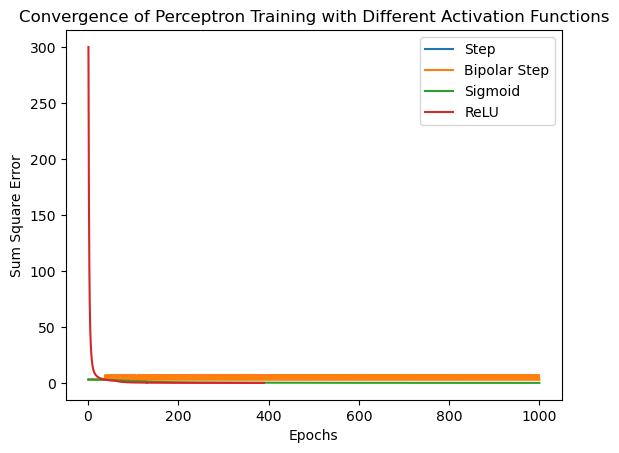

Number of epochs needed for convergence:
Step: 130
Bipolar Step: Not Converged
Sigmoid: Not Converged
ReLU: 390


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Define the activation functions
def step_activation(z):
    return 1 if z >= 0 else 0

def bipolar_step_activation(z):
    return -1 if z < 0 else 1

def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

def relu_activation(z):
    return max(0, z)

# Define the AND gate training data
training_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

# Initialize variables to track error and epochs for each activation function
errors = {"Step": [], "Bipolar Step": [], "Sigmoid": [], "ReLU": []}
converged_epochs = {}

# Define the activation functions to use
activation_functions = {
    "Step": step_activation,
    "Bipolar Step": bipolar_step_activation,
    "Sigmoid": sigmoid_activation,
    "ReLU": relu_activation
}

# Training the perceptron with different activation functions
max_epochs = 1000

for activation_func_name, activation_func in activation_functions.items():
    W0 = 10
    W1 = 0.2
    W2 = -0.75
    converged = False
    
    for epoch in range(max_epochs):
        total_error = 0
        for input_features, target_output in training_data:
            # Calculate the weighted sum of inputs
            weighted_sum = W0 + W1 * input_features[0] + W2 * input_features[1]

            # Calculate the predicted output using the current activation function
            predicted_output = activation_func(weighted_sum)

            # Calculate the error
            error = target_output - predicted_output

            # Update the weights
            W0 += learning_rate * error
            W1 += learning_rate * error * input_features[0]
            W2 += learning_rate * error * input_features[1]

            # Accumulate the total error for this epoch
            total_error += error ** 2

        # Append the total error to the list for plotting
        errors[activation_func_name].append(total_error)

        # Check for convergence
        if total_error <= 0.002:
            converged = True
            converged_epochs[activation_func_name] = epoch + 1
            break

    if not converged:
        converged_epochs[activation_func_name] = "Not Converged"

# Plot the errors over epochs for each activation function
for activation_func_name, error_values in errors.items():
    plt.plot(range(1, len(error_values) + 1), error_values, label=activation_func_name)

plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Convergence of Perceptron Training with Different Activation Functions')
plt.legend()
plt.show()

# Print the number of epochs needed for convergence for each activation function
print("Number of epochs needed for convergence:")
for activation_func_name, epochs in converged_epochs.items():
    print(f"{activation_func_name}: {epochs}")


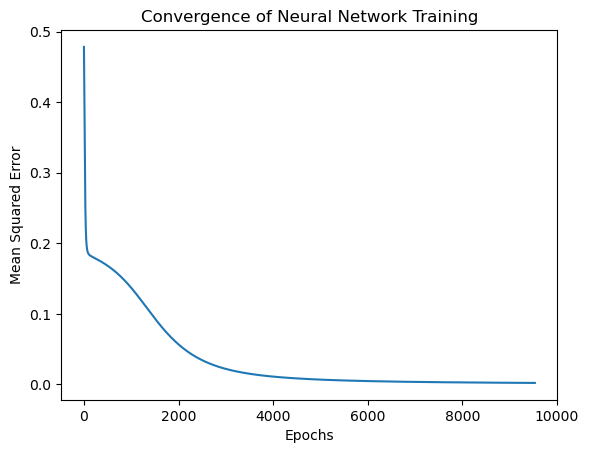

Final Hidden Weights:
[[ 0.85077478  2.19161013 -1.10016978  2.64321648]
 [ 0.60523514  1.45613415 -1.72102215  2.72583858]]
Final Hidden Biases:
[[-0.50074869 -2.45502006  1.75232858 -3.86546987]]
Final Output Weights:
[[ 0.67972292]
 [ 3.31148605]
 [-3.45630353]
 [ 5.39049295]]
Final Output Biases:
[[-3.81737349]]

Test Outputs:
[[0.00216317]
 [0.04666104]
 [0.04627996]
 [0.93938475]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Set the seed for reproducibility
np.random.seed(42)

# Initialize the network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights and biases with random values
hidden_weights = np.random.uniform(size=(input_size, hidden_size))
hidden_biases = np.zeros((1, hidden_size))
output_weights = np.random.uniform(size=(hidden_size, output_size))
output_biases = np.zeros((1, output_size))

# Define the learning rate
learning_rate = 0.05

# Training parameters
epochs = 10000

# Lists to store error values for plotting
errors = []

# Training the neural network using backpropagation
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_biases
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_biases
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error (mean squared error)
    error = y - output_layer_output
    mean_squared_error = np.mean(np.square(error))
    errors.append(mean_squared_error)

    # Backpropagation
    output_delta = error * sigmoid_derivative(output_layer_output)
    hidden_layer_error = output_delta.dot(output_weights.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
    output_biases += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    hidden_weights += X.T.dot(hidden_layer_delta) * learning_rate
    hidden_biases += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    # Check for convergence
    if mean_squared_error <= 0.002:
        break

# Plot the error over epochs
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Convergence of Neural Network Training')
plt.show()

# Print the final weights and biases
print("Final Hidden Weights:")
print(hidden_weights)
print("Final Hidden Biases:")
print(hidden_biases)
print("Final Output Weights:")
print(output_weights)
print("Final Output Biases:")
print(output_biases)

# Test the trained neural network
test_inputs = X
test_outputs = sigmoid(np.dot(sigmoid(np.dot(test_inputs, hidden_weights) + hidden_biases), output_weights) + output_biases)
print("\nTest Outputs:")
print(test_outputs)
